In [1]:
import numpy as np
import matplotlib.pyplot as plt
# SMALL_SIZE = 12
# MEDIUM_SIZE = 12
# BIGGER_SIZE = 12

# # plt.rcParams["font.family"] = "Times New Roman"
# # plt.rcParams["mathtext.fontset"] = "cm"
# plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)


# from matplotlib import pyplot as plt

# def SetPlotRC():
#     #If fonttype = 1 doesn't work with LaTeX, try fonttype 42.
#     plt.rc('pdf',fonttype = 1)
#     plt.rc('ps',fonttype = 1)

# def ApplyFont(ax):

#     ticks = ax.get_xticklabels() + ax.get_yticklabels()

#     text_size = 14.0

#     for t in ticks:
#         t.set_fontname('Times New Roman')
#         t.set_fontsize(text_size)

#     txt = ax.get_xlabel()
#     txt_obj = ax.set_xlabel(txt)
#     txt_obj.set_fontname('Times New Roman')
#     txt_obj.set_fontsize(text_size)

#     txt = ax.get_ylabel()
#     txt_obj = ax.set_ylabel(txt)
#     txt_obj.set_fontname('Times New Roman')
#     txt_obj.set_fontsize(text_size)

#     txt = ax.get_title()
#     txt_obj = ax.set_title(txt)
#     txt_obj.set_fontname('Times New Roman')
#     txt_obj.set_fontsize(text_size)
    
# SetPlotRC()

plt.rcParams['text.usetex'] = True #Let TeX do the typsetting
plt.rcParams['text.latex.preamble'] = [r'\usepackage{sansmath}', r'\sansmath'] #Force sans-serif math mode (for axes labels)
plt.rcParams['font.family'] = 'sans-serif' # ... for regular text
plt.rcParams['font.sans-serif'] = 'Helvetica, Avant Garde, Computer Modern Sans serif' # Choose a nice font here


params = {'pdf.fonttype': 42}
plt.rcParams.update(params)

/var/folders/b3/gd84t8x90lzd1wc3gc7g9hq40000gp/T/ipykernel_35677/990412903.py:53: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{sansmath}', r'\sansmath'] #Force sans-serif math mode (for axes labels)


In [76]:


n = 1000
d = 200



smf = 5
niter = 500
eta = (1/smf)/(1*np.log(d))
# u = 1 * np.ones((d,1))

dists = np.zeros(niter)
distshb = np.zeros(niter)
distsnest = np.zeros(niter)

beta = 1.0*(np.sqrt(smf*np.log(d))-np.sqrt(2))/(np.sqrt(smf*np.log(d))+np.sqrt(2))
reps = 5

for r in range(reps):
    print(r)
    As = np.random.normal(size = (n, d))
    xstar = np.random.normal(size = (d,))
    xstar = xstar / np.linalg.norm(xstar)
    ys = (As @ xstar) ** 2

    u, s, v = np.linalg.svd((As.T @ (np.outer(ys, np.ones(d)) * As)) / n)

    def gradF(x):
        return 1/(1 * n) * As.T @ (np.outer((As @ x) ** 2 - ys, np.ones(d)) * As) @ x

    xi = u[:, 0].copy()
    xihb = u[:, 0].copy()
    xinest = u[:, 0].copy()
    xihbprev = xihb.copy()
    xinestprev = xinest.copy()
    for i in range(niter):
        xi = xi - eta * gradF(xi)
        tmp = xihb.copy()
        xihb = xihb - eta * gradF(xihb) + beta * (xihb - xihbprev)

        tmp2 = xinest.copy()
        xinest = xinest - eta * gradF(xinest +  beta * (xinest - xinestprev)) + beta * (xinest - xinestprev)

        xihbprev = tmp
        xinestprev = tmp2
        dists[i] += min(np.linalg.norm(xi - xstar), np.linalg.norm(xi + xstar))
        distshb[i] += min(np.linalg.norm(xihb - xstar), np.linalg.norm(xihb + xstar))
        distsnest[i] += min(np.linalg.norm(xinest - xstar), np.linalg.norm(xinest + xstar))

dists = dists / reps
distshb = distshb / reps
distsnest = distsnest / reps



0
1
2
3
4


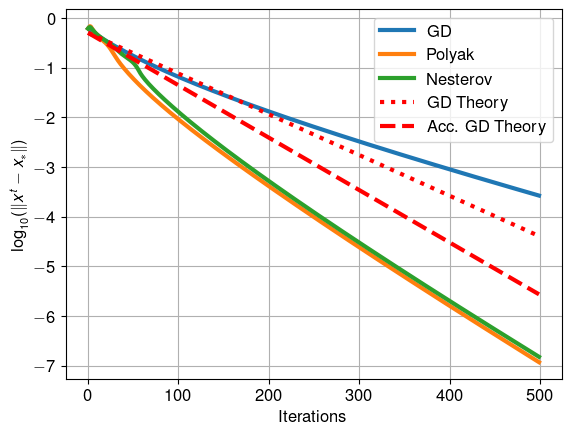

In [77]:
iters = np.arange(niter)

plt.plot(np.log10(dists), linewidth=3)
plt.plot(np.log10(distshb), linewidth=3)
plt.plot(np.log10(distsnest), linewidth=3)
plt.plot(np.log10(.5*np.exp(-.5*iters/(5*np.log(d)))),':r', linewidth=3)
plt.plot(np.log10(.5*np.exp(-.125*iters/np.sqrt(5*np.log(d)))),'--r', linewidth=3)
plt.legend(('GD', 'Polyak', 'Nesterov', 'GD Theory', 'Acc. GD Theory'))
plt.xlabel('Iterations')
plt.ylabel(r'$\log_{10}(\|x^t-x_*\|)$')
plt.grid()

# ApplyFont(plt.gca())
plt.savefig('accelex.png', bbox_inches='tight',dpi=300)

plt.show()


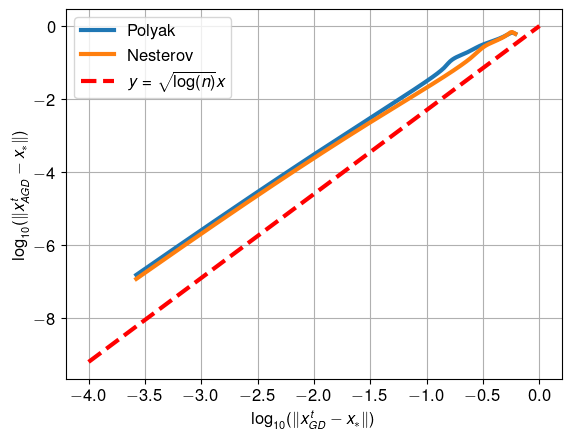

In [78]:
iters = np.arange(niter)

plt.plot(np.log10(dists), np.log10(distsnest), linewidth=3)
plt.plot(np.log10(dists), np.log10(distshb), linewidth=3)
plt.plot(np.linspace(-4, 0, 100), np.sqrt(1*np.log(d))*np.linspace(-4, 0, 100), '--r', linewidth=3)
# plt.plot(np.log10(distsnest), linewidth=3)
# plt.plot(np.log10(.5*np.exp(-.5*iters/(5*np.log(d)))),':r', linewidth=3)
# plt.plot(np.log10(.5*np.exp(-.125*iters/np.sqrt(5*np.log(d)))),'--r', linewidth=3)
plt.legend(('Polyak', 'Nesterov', r'$y=\sqrt{\log(n)}x$'))
plt.xlabel(r'$\log_{10}(\|x_{GD}^t-x_*\|)$')
plt.ylabel(r'$\log_{10}(\|x_{AGD}^t-x_*\|)$')
plt.grid()

# ApplyFont(plt.gca())

plt.savefig('accelex.png', bbox_inches='tight',dpi=300)

plt.show()

In [79]:
# experiment 1: good parameters

reps = 5
ns = [200, 500, 1000]
ds = [10, 50, 100]

niter = 1000


dists = np.zeros((reps,len(ns), len(ds), niter))
distshb = np.zeros((reps,len(ns), len(ds), niter))
distsnest = np.zeros((reps,len(ns), len(ds), niter))
smf = 10


for r in range(reps):
    for j in range(len(ns)):
        for k in range(len(ds)):
            n = ns[j]
            d = ds[k]

            As = np.random.normal(size = (n, d))
            xstar = np.random.normal(size = (d,))
            xstar = xstar / np.linalg.norm(xstar)
            ys = (As @ xstar) ** 2


            gradF = lambda x: 1/(1 * n) * As.T @ (np.outer((As @ x) ** 2 - ys, np.ones(d)) * As) @ x
            niter = 1000
            eta = (1/smf)/np.log(d)
            beta = (np.sqrt(smf*np.log(d))-np.sqrt(2))/(np.sqrt(smf*np.log(d))+np.sqrt(2))

            u, s, v = np.linalg.svd((As.T @ (np.outer(ys, np.ones(d)) * As)) / n)

            # u = 1 * np.ones((d,1))
            xi = u[:, 0]
            xihb = u[:, 0].copy()
            xinest = u[:, 0].copy()
            xihbprev = xihb.copy()
            xinestprev = xinest.copy()
            print(r, j, k)
            for i in range(niter):
                xi = xi - eta * gradF(xi)
                tmp = xihb.copy()
                xihb = xihb - eta * gradF(xihb) + beta * (xihb - xihbprev)

                tmp2 = xinest.copy()
                xinest = xinest - eta * gradF(xinest +  beta * (xinest - xinestprev)) + beta * (xinest - xinestprev)

                xihbprev = tmp
                xinestprev = tmp2
                dists[r, j, k, i] = min(np.linalg.norm(xi - xstar), np.linalg.norm(xi + xstar))
                distshb[r, j, k, i] = min(np.linalg.norm(xihb - xstar), np.linalg.norm(xihb + xstar))
                distsnest[r, j, k, i] = min(np.linalg.norm(xinest - xstar), np.linalg.norm(xinest + xstar))




# plt.plot(np.log10(np.mean(dists, axis = 0)))
# plt.plot(np.log10(np.mean(distshb, axis = 0)))
# plt.plot(np.log10(np.mean(distsnest, axis = 0)))
# plt.legend(('GD', 'Polyak', 'Nesterov'))
# plt.show()

iters = np.arange(niter)

# plt.plot(np.log10(dists), np.log10(distsnest), linewidth=3)
# plt.plot(np.log10(dists), np.log10(distshb), linewidth=3)
# plt.plot(np.linspace(-4, 0, 100), np.sqrt(1*np.log(d))*np.linspace(-4, 0, 100), '--r', linewidth=3)
# # plt.plot(np.log10(distsnest), linewidth=3)
# # plt.plot(np.log10(.5*np.exp(-.5*iters/(5*np.log(d)))),':r', linewidth=3)
# # plt.plot(np.log10(.5*np.exp(-.125*iters/np.sqrt(5*np.log(d)))),'--r', linewidth=3)
# plt.legend(('Polyak', 'Nesterov', r'$y=\sqrt{\log(n)}x$'))
# plt.xlabel(r'$\log_{10}(\|x_{GD}^t-x_*\|)$')
# plt.ylabel(r'$\log_{10}(\|x_{AGD}^t-x_*\|)$')
# plt.grid()
# plt.savefig('accelex.png', bbox_inches='tight',dpi=300)

# plt.show()


c = 1



0 0 0
0 0 1
0 0 2


/var/folders/b3/gd84t8x90lzd1wc3gc7g9hq40000gp/T/ipykernel_46896/559830046.py:28: RuntimeWarning: overflow encountered in square
  gradF = lambda x: 1/(1 * n) * As.T @ (np.outer((As @ x) ** 2 - ys, np.ones(d)) * As) @ x
/var/folders/b3/gd84t8x90lzd1wc3gc7g9hq40000gp/T/ipykernel_46896/559830046.py:28: RuntimeWarning: invalid value encountered in matmul
  gradF = lambda x: 1/(1 * n) * As.T @ (np.outer((As @ x) ** 2 - ys, np.ones(d)) * As) @ x


0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2
3 0 0
3 0 1
3 0 2
3 1 0
3 1 1
3 1 2
3 2 0
3 2 1
3 2 2
4 0 0
4 0 1
4 0 2
4 1 0
4 1 1
4 1 2
4 2 0
4 2 1
4 2 2


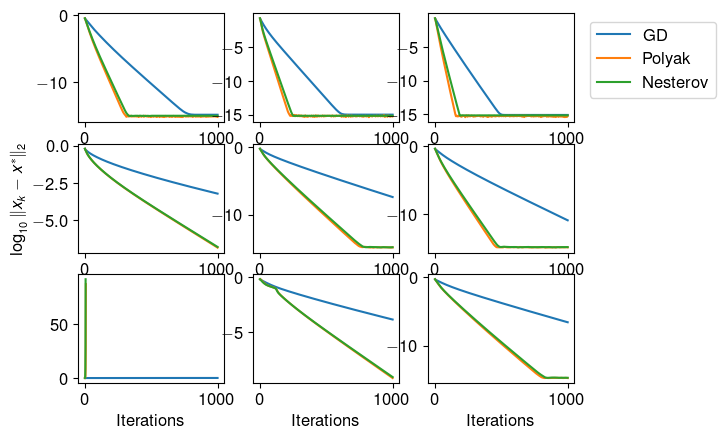

In [80]:
c=1

for j in range(len(ds)):
    for i in range(len(ns)):
        plt.subplot(len(ns), len(ds), c)
        plt.plot(np.log10(np.mean(dists[:, i, j,:], axis = 0)))
        plt.plot(np.log10(np.mean(distshb[:, i, j,:], axis = 0)))
        plt.plot(np.log10(np.mean(distsnest[:, i, j,:], axis = 0)))
        # plt.title('n = ' + str(ns[i]) + ', d = ' + str(ds[j]))

        if c == 3:
            plt.legend(('GD', 'Polyak', 'Nesterov'),bbox_to_anchor=(1.05, 1.0), loc = 'upper left')
        if c==4:
            plt.ylabel(r'$\log_{10}\|x_k - x^*\|_2$')
        if c > 6:
            plt.xlabel('Iterations')
        c += 1

# ApplyFont(plt.gca())

plt.savefig('heavyball_pr.pdf', bbox_inches='tight')

In [81]:
# experiment 1.5: good parameters

reps = 10
ns = [2000]

ds = np.linspace(100, 500, 5).astype(int)

niter = 50

dists = np.zeros((reps,len(ns), len(ds), niter))
distshb = np.zeros((reps,len(ns), len(ds), niter))
distsnest = np.zeros((reps,len(ns), len(ds), niter))
smf = 10


for r in range(reps):
    for j in range(len(ns)):
        for k in range(len(ds)):
            print(r, j, k)
            
            d = ds[k]
            n = int(2* d * np.log(d))

            As = np.random.normal(size = (n, d))
            xstar = np.random.normal(size = (d,))
            xstar = xstar / np.linalg.norm(xstar)
            ys = (As @ xstar) ** 2


            gradF = lambda x: 1/(1 * n) * As.T @ (np.outer((As @ x) ** 2 - ys, np.ones(d)) * As) @ x
            eta = (1/smf)/np.log(d)
            beta = (np.sqrt(smf*np.log(d))-np.sqrt(2))/(np.sqrt(smf*np.log(d))+np.sqrt(2))

            u, s, v = np.linalg.svd((As.T @ (np.outer(ys, np.ones(d)) * As)) / n)

            # u = 1 * np.ones((d,1))
            xi = u[:, 0]
            xihb = u[:, 0].copy()
            xinest = u[:, 0].copy()
            xihbprev = xihb.copy()
            xinestprev = xinest.copy()

            for i in range(niter):
                xi = xi - eta * gradF(xi)
                tmp = xihb.copy()
                xihb = xihb - eta * gradF(xihb) + beta * (xihb - xihbprev)

                tmp2 = xinest.copy()
                xinest = xinest - eta * gradF(xinest +  beta * (xinest - xinestprev)) + beta * (xinest - xinestprev)

                xihbprev = tmp
                xinestprev = tmp2
                dists[r, j, k, i] = min(np.linalg.norm(xi - xstar), np.linalg.norm(xi + xstar))
                distshb[r, j, k, i] = min(np.linalg.norm(xihb - xstar), np.linalg.norm(xihb + xstar))
                distsnest[r, j, k, i] = min(np.linalg.norm(xinest - xstar), np.linalg.norm(xinest + xstar))




# plt.plot(np.log10(np.mean(dists, axis = 0)))
# plt.plot(np.log10(np.mean(distshb, axis = 0)))
# plt.plot(np.log10(np.mean(distsnest, axis = 0)))
# plt.legend(('GD', 'Polyak', 'Nesterov'))
# plt.show()


0 0 0
0 0 1
0 0 2
0 0 3
0 0 4
1 0 0
1 0 1
1 0 2
1 0 3
1 0 4
2 0 0
2 0 1
2 0 2
2 0 3
2 0 4
3 0 0
3 0 1
3 0 2
3 0 3
3 0 4
4 0 0
4 0 1
4 0 2
4 0 3
4 0 4
5 0 0
5 0 1
5 0 2
5 0 3
5 0 4
6 0 0
6 0 1
6 0 2
6 0 3
6 0 4
7 0 0
7 0 1
7 0 2
7 0 3
7 0 4
8 0 0
8 0 1
8 0 2
8 0 3
8 0 4
9 0 0
9 0 1
9 0 2
9 0 3
9 0 4


In [82]:
slopes_hb = np.zeros(len(ds))
slopes_nest = np.zeros(len(ds))
for i in range(len(ds)):
    slopes_hb[i] = np.polyfit(np.log10(np.mean(dists[:, 0, i, :], axis = 0)), np.log10(np.mean(distshb[:, 0, i, :], axis = 0)), 1)[0]
    slopes_nest[i] = np.polyfit(np.log10(np.mean(dists[:, 0, i, :], axis = 0)), np.log10(np.mean(distsnest[:, 0, i, :], axis = 0)), 1)[0]

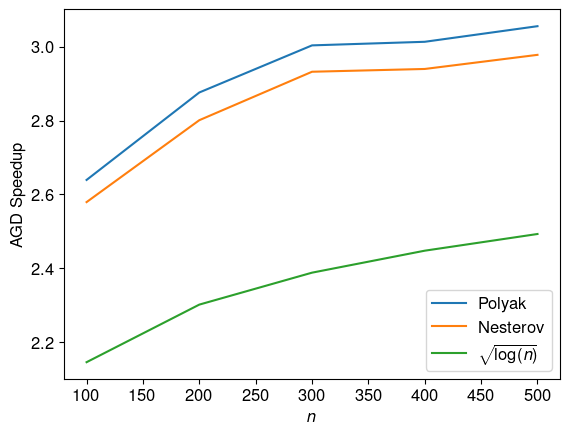

In [83]:
plt.plot(ds, slopes_hb)
plt.plot(ds, slopes_nest)
plt.plot(ds, np.sqrt(np.log(ds)))
plt.legend(('Polyak', 'Nesterov', r'$\sqrt{\log(n)}$'))
plt.ylabel('AGD Speedup')
plt.xlabel(r'$n$')
# plt.show()
plt.savefig('accelex_2.png', bbox_inches='tight',dpi=300)


In [84]:

# iters = np.arange(niter)
# plt.figure()
# i=0
# for j in range(len(ds)):
#     d = ds[j]
#     plt.plot(np.log10(np.mean(dists[:, i, j,:], axis = 0)), np.log10(np.mean(distshb[:, i, j,:], axis = 0)), 'b', linewidth=3)
#     plt.plot(np.log10(np.mean(dists[:, i, j,:], axis = 0)), np.log10(np.mean(distsnest[:, i, j,:], axis = 0)), 'r', linewidth=3)

#     # plt.plot(np.linspace(-4, 0, 100), np.sqrt(2*np.log(d))*np.linspace(-4, 0, 100), '--r', linewidth=3)
#     # plt.plot(np.log10(distsnest), linewidth=3)
#     # plt.plot(np.log10(.5*np.exp(-.5*iters/(5*np.log(d)))),':r', linewidth=3)
#     # plt.plot(np.log10(.5*np.exp(-.125*iters/np.sqrt(5*np.log(d)))),'--r', linewidth=3)
# # plt.legend(('Polyak', 'Nesterov', r'$y=\sqrt{\log(n)}x$'))
# plt.xlabel(r'$\log_{10}(\|x_{GD}^t-x_*\|)$')
# plt.ylabel(r'$\log_{10}(\|x_{AGD}^t-x_*\|)$')
# plt.grid()

# plt.savefig('accelex_2.png', bbox_inches='tight',dpi=300)

# plt.show()


0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2
3 0 0
3 0 1
3 0 2
3 1 0
3 1 1
3 1 2
3 2 0
3 2 1
3 2 2
4 0 0
4 0 1
4 0 2
4 1 0
4 1 1
4 1 2
4 2 0
4 2 1
4 2 2


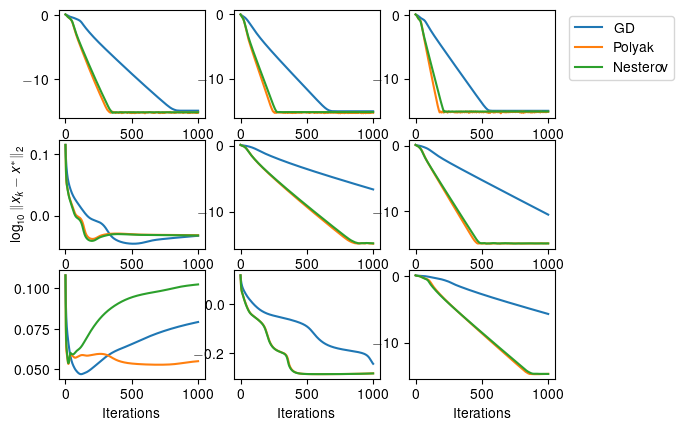

In [2]:
# experiment 2: random initialization

reps = 5
ns = [200, 500, 1000]
ds = [10, 50, 100]
niter = 1000


dists = np.zeros((reps,len(ns), len(ds), niter))
distshb = np.zeros((reps,len(ns), len(ds), niter))
distsnest = np.zeros((reps,len(ns), len(ds), niter))

smf = 10

for r in range(reps):
    for j in range(len(ns)):
        for k in range(len(ds)):
            print(r, j, k)
            
            n = ns[j]
            d = ds[k]

            As = np.random.normal(size = (n, d))
            xstar = np.random.normal(size = (d,))
            xstar = xstar / np.linalg.norm(xstar)
            ys = (As @ xstar) ** 2


            gradF = lambda x: 1/(1 * n) * As.T @ (np.outer((As @ x) ** 2 - ys, np.ones(d)) * As) @ x
            eta = (1/smf)/np.log(d)
            beta = (np.sqrt(smf*np.log(d))-np.sqrt(2))/(np.sqrt(smf*np.log(d))+np.sqrt(2))

            u, s, v = np.linalg.svd((As.T @ (np.outer(ys, np.ones(d)) * As)) / n)

            u = np.random.normal(size = (d,))
            u = u / np.linalg.norm(u)
            # u = 1 * np.ones((d,1))
            xi = u.copy()
            xihb = u.copy()
            xinest = u.copy()
            xihbprev = xihb.copy()
            xinestprev = xinest.copy()

            for i in range(niter):
                xi = xi - eta * gradF(xi)
                tmp = xihb.copy()
                xihb = xihb - eta * gradF(xihb) + beta * (xihb - xihbprev)

                tmp2 = xinest.copy()
                xinest = xinest - eta * gradF(xinest +  beta * (xinest - xinestprev)) + beta * (xinest - xinestprev)

                xihbprev = tmp
                xinestprev = tmp2
                dists[r, j, k, i] = min(np.linalg.norm(xi - xstar), np.linalg.norm(xi + xstar))
                distshb[r, j, k, i] = min(np.linalg.norm(xihb - xstar), np.linalg.norm(xihb + xstar))
                distsnest[r, j, k, i] = min(np.linalg.norm(xinest - xstar), np.linalg.norm(xinest + xstar))


c = 1

for j in range(len(ds)):
    for i in range(len(ns)):
        plt.subplot(len(ns), len(ds), c)
        plt.plot(np.log10(np.mean(dists[:, i, j,:], axis = 0)))
        plt.plot(np.log10(np.mean(distshb[:, i, j,:], axis = 0)))
        plt.plot(np.log10(np.mean(distsnest[:, i, j,:], axis = 0)))
        # plt.title('n = ' + str(ns[i]) + ', d = ' + str(ds[j]))

        if c == 3:
            plt.legend(('GD', 'Polyak', 'Nesterov'),bbox_to_anchor=(1.05, 1.0), loc = 'upper left')
        if c==4:
            plt.ylabel(r'$\log_{10}\|x_k - x^*\|_2$')
        if c > 6:
            plt.xlabel('Iterations')
        c += 1

plt.savefig('heavyball_pr_raninit.png', bbox_inches='tight')

# plt.plot(np.log10(np.mean(dists, axis = 0)))
# plt.plot(np.log10(np.mean(distshb, axis = 0)))
# plt.plot(np.log10(np.mean(distsnest, axis = 0)))
# plt.legend(('GD', 'Polyak', 'Nesterov'))
# plt.show()

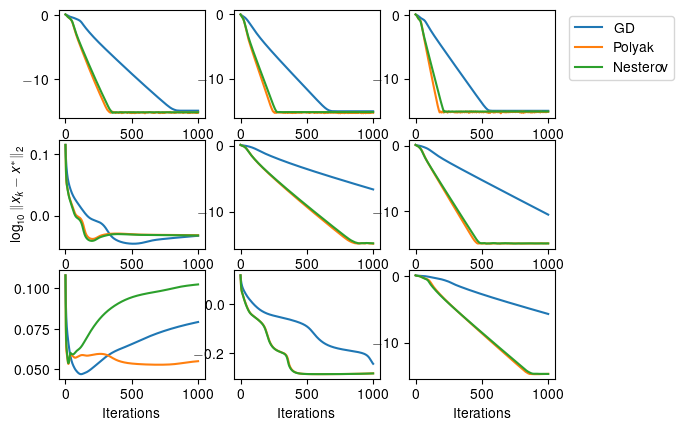

In [3]:
c = 1

for j in range(len(ds)):
    for i in range(len(ns)):
        plt.subplot(len(ns), len(ds), c)
        plt.plot(np.log10(np.mean(dists[:, i, j,:], axis = 0)))
        plt.plot(np.log10(np.mean(distshb[:, i, j,:], axis = 0)))
        plt.plot(np.log10(np.mean(distsnest[:, i, j,:], axis = 0)))
        # plt.title('n = ' + str(ns[i]) + ', d = ' + str(ds[j]))

        if c == 3:
            plt.legend(('GD', 'Polyak', 'Nesterov'),bbox_to_anchor=(1.05, 1.0), loc = 'upper left')
        if c==4:
            plt.ylabel(r'$\log_{10}\|x_k - x^*\|_2$')
        if c > 6:
            plt.xlabel('Iterations')
        c += 1

plt.savefig('heavyball_pr_raninit.pdf', bbox_inches='tight')

In [86]:
# experiment 3: small momentum parameter
# reps = 5
# ns = [500]
# ds = [50]
# niter = 1000

# smfs = [10, 5, 2]
# betas = [.55, .75, .95]

# dists = np.zeros((reps,len(smfs), len(betas), niter))
# distshb = np.zeros((reps,len(smfs), len(betas), niter))
# distsnest = np.zeros((reps,len(smfs), len(betas), niter))


# for r in range(reps):
#     for j in range(len(smfs)):
#         for k in range(len(betas)):
#             print(r, j, k)
            
            
#             n = ns[0]
#             d = ds[0]

#             As = np.random.normal(size = (n, d))
#             xstar = np.random.normal(size = (d,))
#             xstar = xstar / np.linalg.norm(xstar)
#             ys = (As @ xstar) ** 2


#             gradF = lambda x: 1/(1 * n) * As.T @ (np.outer((As @ x) ** 2 - ys, np.ones(d)) * As) @ x
            
#             smf = smfs[j]
#             eta = (1/smf)/np.log(d)
#             beta = betas[k]

#             u, s, v = np.linalg.svd((As.T @ (np.outer(ys, np.ones(d)) * As)) / n)

#             u = np.random.normal(size = (d,))
#             u = u / np.linalg.norm(u)
#             # u = 1 * np.ones((d,1))
#             xi = u.copy()
#             xihb = u.copy()
#             xinest = u.copy()
#             xihbprev = xihb.copy()
#             xinestprev = xinest.copy()

#             for i in range(niter):
#                 xi = xi - eta * gradF(xi)
#                 tmp = xihb.copy()
#                 xihb = xihb - eta * gradF(xihb) + beta * (xihb - xihbprev)

#                 tmp2 = xinest.copy()
#                 xinest = xinest - eta * gradF(xinest +  beta * (xinest - xinestprev)) + beta * (xinest - xinestprev)

#                 xihbprev = tmp
#                 xinestprev = tmp2
#                 dists[r, j, k, i] = min(np.linalg.norm(xi - xstar), np.linalg.norm(xi + xstar))
#                 distshb[r, j, k, i] = min(np.linalg.norm(xihb - xstar), np.linalg.norm(xihb + xstar))
#                 distsnest[r, j, k, i] = min(np.linalg.norm(xinest - xstar), np.linalg.norm(xinest + xstar))


# c = 1

# for j in range(len(smfs)):
#     for i in range(len(betas)):
#         plt.subplot(len(smfs), len(betas), c)
#         plt.plot(np.log10(np.mean(dists[:, i, j,:], axis = 0)))
#         plt.plot(np.log10(np.mean(distshb[:, i, j,:], axis = 0)))
#         plt.plot(np.log10(np.mean(distsnest[:, i, j,:], axis = 0)))
#         # plt.title('n = ' + str(ns[i]) + ', d = ' + str(ds[j]))

#         if c == 3:
#             plt.legend(('GD', 'Polyak', 'Nesterov'),bbox_to_anchor=(1.05, 1.0), loc = 'upper left')
#         if c==4:
#             plt.ylabel(r'$\log_{10}\|x_k - x^*\|_2$')
#         if c > 6:
#             plt.xlabel('Iterations')
#         c += 1

# plt.savefig('accel_pr_smallbeta.pdf', bbox_inches='tight')


In [87]:
# experiment 4: small momentum parameter

# reps = 1
# ns = [200, 500, 1000]
# ds = [20]
# conds = [1, 5, 10]

# dists = np.zeros((reps,len(ns), len(conds), niter))
# distshb = np.zeros((reps,len(ns), len(conds), niter))
# distsnest = np.zeros((reps,len(ns), len(conds), niter))



# for r in range(reps):
#     for j in range(len(ns)):
#         for k in range(len(conds)):
#             n = ns[j]
#             d = ds[0]
#             c = conds[k]

#             As = np.random.normal(size = (n, d)) @ np.diag(np.linspace(1, 2, d)) * c
#             xstar = np.random.normal(size = (d,))
#             xstar = xstar / np.linalg.norm(xstar)
#             ys = (As @ xstar) ** 2


#             gradF = lambda x: 1/(1 * n) * As.T @ (np.outer((As @ x) ** 2 - ys, np.ones(d)) * As) @ x
#             niter = 1000
#             eta = .005/(c*np.log(n))
#             beta = (np.sqrt(c*np.log(d))-np.sqrt(2))/(np.sqrt(c*np.log(d))+np.sqrt(2))

#             u, s, v = np.linalg.svd((As.T @ (np.outer(ys, np.ones(d)) * As)) / n)

#             # u = 1 * np.ones((d,1))
#             xi = u[:, 0]
#             xihb = u[:, 0].copy()
#             xinest = u[:, 0].copy()
#             xihbprev = xihb.copy()
#             xinestprev = xinest.copy()

#             for i in range(niter):
#                 xi = xi - eta * gradF(xi)
#                 tmp = xihb.copy()
#                 xihb = xihb - eta * gradF(xihb) + beta * (xihb - xihbprev)

#                 tmp2 = xinest.copy()
#                 xinest = xinest - eta * gradF(xinest +  beta * (xinest - xinestprev)) + beta * (xinest - xinestprev)

#                 xihbprev = tmp
#                 xinestprev = tmp2
#                 dists[r, j, k, i] = min(np.linalg.norm(xi - xstar), np.linalg.norm(xi + xstar))
#                 distshb[r, j, k, i] = min(np.linalg.norm(xihb - xstar), np.linalg.norm(xihb + xstar))
#                 distsnest[r, j, k, i] = min(np.linalg.norm(xinest - xstar), np.linalg.norm(xinest + xstar))

# c = 1

# for j in range(len(conds)):
#     for i in range(len(ns)):
#         plt.subplot(len(ns), len(conds), c)
#         plt.plot(np.log10(np.mean(dists[:, i, j,:], axis = 0)))
#         plt.plot(np.log10(np.mean(distshb[:, i, j,:], axis = 0)))
#         plt.plot(np.log10(np.mean(distsnest[:, i, j,:], axis = 0)))
#         # plt.title('n = ' + str(ns[i]) + ', d = ' + str(ds[j]))

#         if c == 3:
#             plt.legend(('GD', 'Polyak', 'Nesterov'),bbox_to_anchor=(1.05, 1.0), loc = 'upper left')
#         if c==4:
#             plt.ylabel(r'$\log_{10}\|x_k - x^*\|_2$')
#         if c > 6:
#             plt.xlabel('Iterations')
#         c += 1


In [88]:
# import numpy as np
# import matplotlib.pyplot as plt

# n = 100
# d = 10

# As = np.random.normal(size = (n, d))
# xstar = np.random.normal(size = (d,))
# ys = (As @ xstar) 

# u, s, v = np.linalg.svd((As.T @ (np.outer(ys, np.ones(d)) * As)) / n)

# def gradF(x):
#     return 1/(1 * n) * As.T @ ((As @ x)  - ys)

# niter = 1000
# eta = 0.01
# # u = 1 * np.ones((d,1))
# xi = u[:, 0]
# xihb = u[:, 0]
# dists = np.zeros(niter)
# distshb = np.zeros(niter)
# xihbprev = xihb.copy()
# beta = .99

# for i in range(niter):
#     xi = xi - eta * gradF(xi)
#     tmp = xihb.copy()
#     xihb = xihb - eta * gradF(xihb) + beta * (xihb - xihbprev)
#     xihbprev = tmp
#     dists[i] = min(np.linalg.norm(xi - xstar), np.linalg.norm(xi + xstar))
#     distshb[i] = min(np.linalg.norm(xihb - xstar), np.linalg.norm(xihb + xstar))

# plt.plot(np.log10(dists))
# plt.plot(np.log10(distshb))
# plt.legend(('GD', 'Heavy Ball'))
# plt.show()

In [89]:
# experiment 2

# reps = 1
# ns = np.arange(50, 100, 1)
# ds = np.arange(5, 50, 1)

# niter = 1000

# dists = np.zeros((reps,len(ns), len(ds), niter))
# distshb = np.zeros((reps,len(ns), len(ds), niter))
# distsnest = np.zeros((reps,len(ns), len(ds), niter))


# for r in range(reps):
#     for j in range(len(ns)):
#         for k in range(len(ds)):
#             n = ns[j]
#             d = ds[k]

#             As = np.random.normal(size = (n, d))
#             xstar = np.random.normal(size = (d,))
#             xstar = xstar / np.linalg.norm(xstar)
#             ys = (As @ xstar) ** 2


#             gradF = lambda x: 1/(1 * n) * As.T @ (np.outer((As @ x) ** 2 - ys, np.ones(d)) * As) @ x
#             eta = .1/np.log(d)
#             beta = .8 #(np.sqrt(np.log(d))-np.sqrt(2))/(np.sqrt(np.log(d))+np.sqrt(2))

#             u, s, v = np.linalg.svd((As.T @ (np.outer(ys, np.ones(d)) * As)) / n)

#             u = np.random.normal(size = (d,))
#             u = u / np.linalg.norm(u)
#             # u = 1 * np.ones((d,1))
#             xi = u.copy()
#             xihb = u.copy()
#             xinest = u.copy()
#             xihbprev = xihb.copy()
#             xinestprev = xinest.copy()

#             for i in range(niter):
#                 xi = xi - eta * gradF(xi)
#                 tmp = xihb.copy()
#                 xihb = xihb - eta * gradF(xihb) + beta * (xihb - xihbprev)

#                 tmp2 = xinest.copy()
#                 xinest = xinest - eta * gradF(xinest +  beta * (xinest - xinestprev)) + beta * (xinest - xinestprev)

#                 xihbprev = tmp
#                 xinestprev = tmp2
#                 dists[r, j, k, i] = min(np.linalg.norm(xi - xstar), np.linalg.norm(xi + xstar))
#                 distshb[r, j, k, i] = min(np.linalg.norm(xihb - xstar), np.linalg.norm(xihb + xstar))
#                 distsnest[r, j, k, i] = min(np.linalg.norm(xinest - xstar), np.linalg.norm(xinest + xstar))
            
#             print(r, j, k)




In [90]:
# distmean = np.mean(dists, axis = 0)
# distnestmean = np.mean(distsnest, axis = 0)
# disthbmean = np.mean(distshb, axis = 0)

# itergd = np.zeros((len(ns), len(ds)))
# iterhb = np.zeros((len(ns), len(ds)))
# iternest = np.zeros((len(ns), len(ds)))

# for i in range(len(ns)):
#     for j in range(len(ds)):
#         itergd[i,j] = next((x for x, v in enumerate(distmean[i,j,:]) if v < 1e-6), np.inf)
#         iterhb[i,j] = next((x for x, v in enumerate(disthbmean[i,j,:]) if v < 1e-6), np.inf)
#         iternest[i,j] = next((x for x, v in enumerate(distnestmean[i,j,:]) if v < 1e-6), np.inf)



In [91]:

# plt.imshow((itergd))
# plt.colorbar()
# plt.clim(0, 1000)
# plt.show()

# plt.imshow((iterhb/itergd))
# plt.colorbar()
# plt.clim(0, 2)
# plt.show()


# plt.imshow((iternest/itergd))
# plt.colorbar()
# plt.clim(0, 2)
# plt.show()